array([ 1.00000004,  1.00000033,  1.00000256,  1.00001974,  1.00015191,
        1.00116918,  1.0089957 ,  1.06904089,  1.51995227,  4.43281208,
       13.61359496, 20.33022217, 21.76692948, 21.96938887, 21.99575047,
       21.99738974, 21.98382916, 21.87657539, 21.08047983, 16.32131748,
        4.6635998 , -1.6421681 , -2.81483482, -2.97577219, -2.99673699,
       -2.99870933, -2.99316723, -2.94814739, -2.61980624, -0.85419194,
        2.40996896,  3.74253472,  3.96544397,  3.99549417,  3.99943846,
        4.00011325,  4.00144609,  4.01109709,  4.07951303,  4.3993526 ,
        4.83653275,  4.97524037,  4.99671234,  4.99957163,  4.99994432,
        4.99999277,  4.99999906,  4.99999988,  4.99999998,  5.        ])

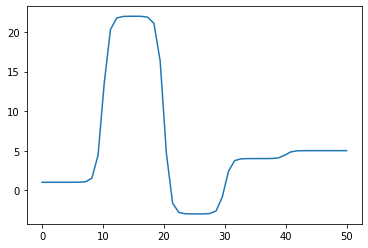

In [103]:
# Fórmula para adicionar R0 às tangentes hiperbólicas.

R0_1 = 1
R0_2 = 22
R0_3 = -3
R0_4 = 4
R0_5 = 5

N = (R0_1+R0_2)/2
M = (R0_3+R0_2)/2
O = (R0_3+R0_4)/2
P = (R0_5+R0_4)/2

A = R0_1 - N
B = R0_2 - M
C = R0_3 - O
D = R0_4 - P

t = np.linspace(0,50,50)
R0 = - A*np.tanh((t - 10)) + N - B*np.tanh((t - 20)) + M - R0_2 - C*np.tanh(t-30) + O - R0_3 - D*np.tanh(t-40) + P - R0_4

plt.plot(t, R0)
R0

In [108]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

In [123]:
def grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_1, R0_2, R0_3, x_esq, x_dir, coef_s, coef_d, t_alt):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
    dados0_x_rio = dados0.index[oeste:leste].to_numpy()
    
    if dados_limpos == True:
        dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
        dados1_x_rio = dados1.index[oeste:leste].to_numpy()

    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

    ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
    ax.axvline(t_pico, color='g',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")
    ax.axvline(t_alt, color='b',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")

    
    if dados_limpos == True:
        ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

    ax.grid(True)
    ax.set_ylabel('Densidade populacional')
    ax.set_xlabel('Dias consecutivos')
    ax.legend(frameon=False, loc='upper left')
    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

    ax2 = plt.axes([0.65,0.65,0.2,0.2])
    ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
    ax2.set_ylabel('R0')
    ax2.set_xlabel('Dias')
    ax2.axvline(t_pico, color='g',label='Pico')
    ax2.set_yticks([R0_2, R0_3, R0_1 ])
    ax2.legend(frameon=False)



    label2 = [dados0.loc[x_esq]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[x_dir]['Datas']]
    ax2.set_xticks([x_esq,t_pico,x_dir], labels=label2)

    ax2.set_xlim([x_esq,x_dir])
    ax.set_xlim([x_esq,x_dir])
    ax.set_title(f'{nome_cidade}; Modelo SIR modificado; R0_1: {round(R0_1,2)}; R0_2: {round(R0_2,2)}; R0_3: {round(R0_3,2)}')
    
    #plt.savefig('/home/isplay/Área de Trabalho/Dados.pdf')

    return

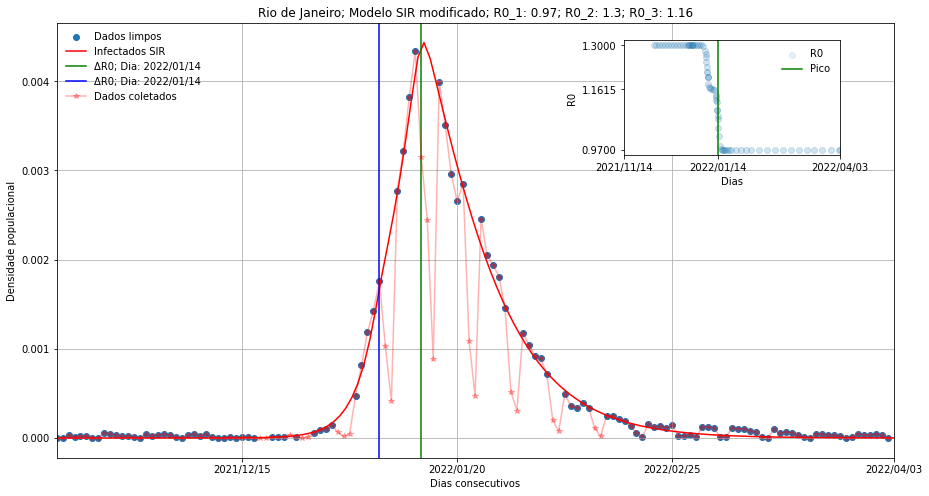

In [124]:
# Rio de Janeiro

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Rio_de_Janeiro_cidade.csv'
dados1 = pd.read_csv(url1)

# Região
população = 6775561
nome_cidade = 'Rio de Janeiro'

# Intervalo do maior gráfico
oeste = 635
leste = 780

# Intervalo do menor gráfico
x_esq = 640
x_dir = 780


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = - A*np.tanh(b*(t - t_alt)) + N - B*np.tanh(a*(t - t_pico)) + M - R0_2
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.1615219031945897
coef_d = -0.10009838636511394

# Função R0(t)
R0_1 = 0.3 + 1                    
R0_2 = coef_s + 1
R0_3 = 0.97
a = 1
b = 1

#R = 0.88
#R0_2 = R*1/(1-(-coef_d))          # Pode estar errado????

N = (R0_1+R0_2)/2
M = (R0_2+R0_3)/2

A = R0_1 - N
B = R0_2 - M

list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_alt = 694
t_pico = 701

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_3, R0_1, R0_2, x_esq, x_dir, coef_s, coef_d, t_alt)

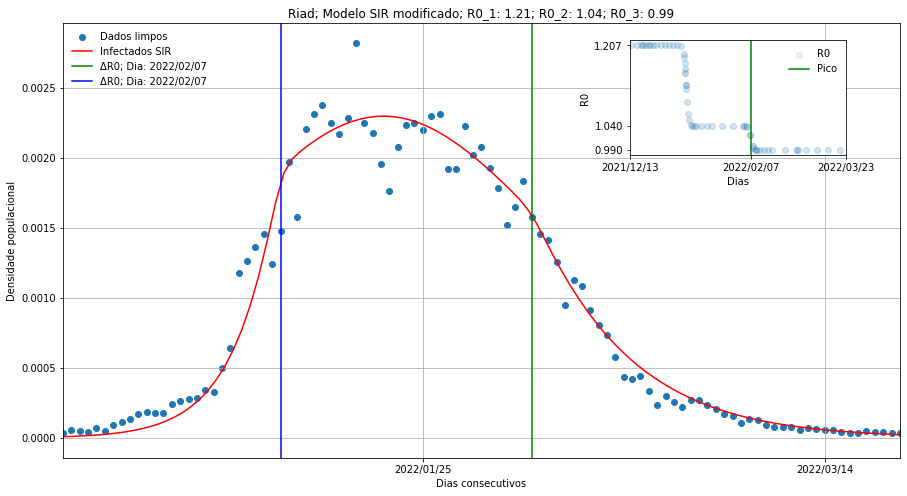

In [125]:
# Riad

# Entrada
dados0 = pd.read_csv('https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Riad_casos.csv')
dados_limpos = False
dados1 = 0

# Região
população = 7676654 - 7000000
nome_cidade = 'Riad'

# Intervalo do maior gráfico
oeste = 586
leste = 780

# Intervalo do menor gráfico
x_esq = 640
x_dir = 740


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = B*np.tanh(b*(t - t_alt)) + N - A*np.tanh(a*(t - t_pico)) + M - R0_2
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.2
coef_d = -0.2

# Função R0(t)
R0_1 = 1.207
R0_2 = 1.04
R0_3 = 0.99
a = 1
b = 1

#R = 0.88
#R*1/(1-(-coef_d))

M = (R0_2+R0_3)/2
N = (R0_2+R0_1)/2
A = R0_2 - M
B = R0_2 - N
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_alt = 666
t_pico =  696

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_1, R0_2, R0_3, x_esq, x_dir, coef_s, coef_d, t_alt)


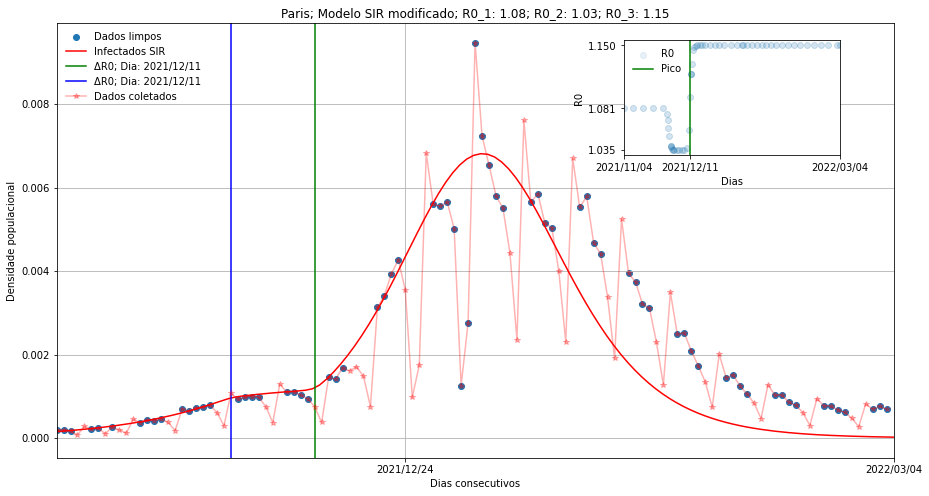

In [126]:
# Paris

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Paris_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Paris_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 2148271
nome_cidade = 'Paris'

# Intervalo do maior gráfico
oeste = 380
leste = 660

# Intervalo do menor gráfico
x_esq = 540
x_dir = 660


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = -A*np.tanh(a*(t - t_alt)) + N - B*np.tanh(b*(t - t_pico)) + M - R0_2
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.08090757480294411
coef_d = -0.059127473095335725

# Função R0(t)
R0_1 = 1.081
R0_2 = 1.035
R0_3 = 1.15
a = 1
b = 1

#R = 0.88
#R*1/(1-(-coef_d))

N = (R0_2+R0_1)/2
M = (R0_2+R0_3)/2
A = R0_1 - N
B = R0_2 - M
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_alt = 565
t_pico =  577

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_1, R0_2, R0_3, x_esq, x_dir, coef_s, coef_d, t_alt)

array([1.10000025, 1.10000128, 1.10000653, 1.10003343, 1.10017099,
       1.10087296, 1.10441442, 1.1213    , 1.1843443 , 1.30004855,
       1.37331448, 1.39438001, 1.39886759, 1.39968893, 1.39948338,
       1.39757426, 1.38782941, 1.3425254 , 1.18907157, 0.95896873,
       0.83948035, 0.80814615, 0.80160942, 0.80031518, 0.80006162,
       0.80001204, 0.80000235, 0.80000046, 0.80000009, 0.80000002,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ])

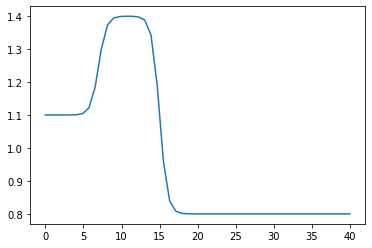

In [27]:
t = np.linspace(0,40)

R0_1 = 1.1
R0_2 = 1.4
R0_3 = 0.5
R0_4 = 2.0

M = (R0_1+R0_2)/2
N = (R0_1+R0_3)/2
O = (R0_1+R0_4)/2

A = R0_2 - M
B = R0_1 - N

#C = R0_1 - O

"""M = (R0_2+R0_3)/2
N = (R0_2+R0_1)/2
A = R0_2 - M
B = R0_2 - N"""

b = a = 1

R0 = A*np.tanh(t - 7) + M - B*np.tanh(t - 15) + N - R0_1

#R0 = B*np.tanh(b*(t - 7)) + M

#R0 = A*np.tanh(t - 7) + M - B*np.tanh(t - 25) + N - R0_1

#R0 = B*np.tanh(b*(t - 7)) + N - A*np.tanh(a*(t - 15)) + M - R0_1 # + C*np.tanh(t-25) + O - R0_2

plt.plot(t, R0)
R0

array([1.00000083, 1.00000426, 1.00002178, 1.00011143, 1.00056995,
       1.00290986, 1.01471474, 1.07100003, 1.28114779, 1.66682918,
       1.91105174, 1.9812844 , 1.99631586, 1.99942645, 2.00064752,
       2.00400117, 2.02027617, 2.0957894 , 2.35154707, 2.73505206,
       2.93419941, 2.98642308, 2.99731763, 2.9994747 , 2.99989731,
       2.99997993, 2.99999608, 2.99999923, 2.99999985, 2.99999997,
       2.99999999, 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ])

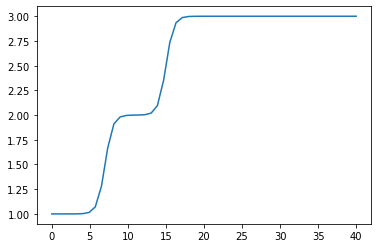

In [17]:
R0_1 = 1
R0_2 = 2
R0_3 = 3
R0_e = 4

M = (R0_2+R0_3)/2
N = (R0_2+R0_1)/2
O = (R0_2+R0_e)/2

A = R0_2 - M
B = R0_2 - N
C = R0_2 - O


R0 = B*np.tanh(b*(t - 7)) + N - A*np.tanh(a*(t - 15)) + M - R0_2 #- C*np.tanh(t - 25) + C 

plt.plot(t, R0)
R0

array([2.49458408e-06, 1.92004319e-05, 1.47777275e-04, 1.13705031e-03,
       8.72959317e-03, 6.59063961e-02, 4.42214509e-01, 1.71283979e+00,
       2.73315176e+00, 2.96242212e+00, 2.99506399e+00, 2.99935778e+00,
       2.99991655e+00, 2.99998916e+00, 2.99999859e+00, 2.99999982e+00,
       2.99999998e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00])

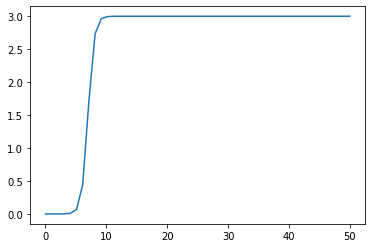

In [72]:
R0_1 = 1
R0_2 = 2
R0_3 = 3
R0_4 = 4
R0_5 = 5

M = (R0_2+R0_3)/2


N = (R0_3+R0_1)/2
O = (R0_1+R0_e)/2
P = (R0_e+R0_g)/2

A = R0_1/2 + R0_2/2
B = R0_3 - N
C = R0_e - O
D = R0_1 - P

t = np.linspace(0,50,50)
R0 = A*np.tanh((t - 7)) + A #- B*np.tanh((t - 15)) + N + A

plt.plot(t, R0)
R0

array([1.        , 1.00000002, 1.00000012, 1.00000094, 1.00000723,
       1.00005568, 1.00042837, 1.00328766, 1.02475963, 1.16346724,
       1.60064739, 1.92048682, 1.98890181, 1.99854542, 1.99982147,
       2.00005912, 2.00064095, 2.00493622, 2.03678071, 2.22714729,
       2.69345601, 2.94568673, 2.99259347, 2.99903148, 2.99987406,
       2.99998364, 2.99999787, 2.99999972, 2.99999996, 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ,
       3.        , 3.        , 3.        , 3.        , 3.        ])

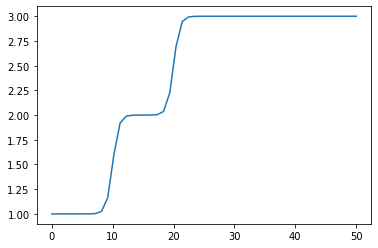

In [97]:
R0_1 = 1
R0_2 = 2
R0_3 = 3

N = (R0_1+R0_2)/2
M = (R0_3+R0_2)/2

A = R0_1 - N
B = R0_2 - M

t = np.linspace(0,50,50)
R0 = -A*np.tanh((t - 10)) + N - B*np.tanh((t - 20)) + M - R0_2

plt.plot(t, R0)
R0

array([ 1.        ,  1.00000002,  1.00000012,  1.00000094,  1.00000723,
        1.00005568,  1.00042837,  1.00328766,  1.02475963,  1.16346724,
        1.60064737,  1.92048668,  1.9889007 ,  1.99853694,  1.99975619,
        1.99955671,  1.99677607,  1.97531641,  1.81609614,  0.86426352,
       -1.46728001, -2.72843342, -2.96296542, -2.99514253, -2.99925576,
       -2.99903661, -2.99320975, -2.94815291, -2.61980696, -0.85419204,
        2.40996894,  3.74253467,  3.96544355,  3.99549097,  3.99941385,
        3.99992384,  3.9999901 ,  3.99999871,  3.99999983,  3.99999998,
        4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
        4.        ,  4.        ,  4.        ,  4.        ,  4.        ])

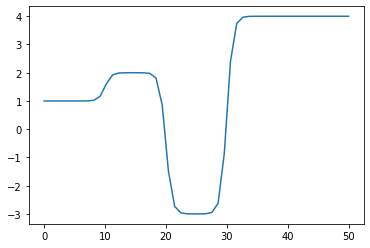

In [101]:
R0_1 = 1
R0_2 = 2
R0_3 = -3
R0_4 = 4

N = (R0_1+R0_2)/2
M = (R0_3+R0_2)/2
O = (R0_3+R0_4)/2

A = R0_1 - N
B = R0_2 - M
C = R0_3 - O

t = np.linspace(0,50,50)
R0 = -A*np.tanh((t - 10)) + N - B*np.tanh((t - 20)) + M - R0_2 - C*np.tanh(t-30) + O - R0_3

plt.plot(t, R0)
R0